In [15]:
import matplotlib.pyplot as plt
import pandas as pd

import nltk 
nltk.download('stopwords')
import wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jan_marcglowienke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', encoding = 'latin', header=None)

### First look at data

In [4]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Rename columns

In [5]:
data = data.rename(columns={0: 'target_emotion', 1: 'id', 2: 'datetime stamp', 3: 'query', 4: 'username', 5: 'content'})
data.head(1)

,target_emotion,id,datetime stamp,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."


### Analyse for missing values and skew in target class

In [6]:
missing_data = data.isna().sum().sort_values(ascending=False)
percentage_missing = round((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing_data,percentage_missing],keys=['Missing values','Percentage'],axis=1)
missing_info

,Missing values,Percentage
target_emotion,0,0.0
id,0,0.0
datetime stamp,0,0.0
query,0,0.0
username,0,0.0
content,0,0.0


In [9]:
data['target_emotion'] = data['target_emotion'].replace([0, 4],['Negative','Positive'])
data['target_emotion'].value_counts()

target_emotion
Negative    800000
Positive    800000
Name: count, dtype: int64

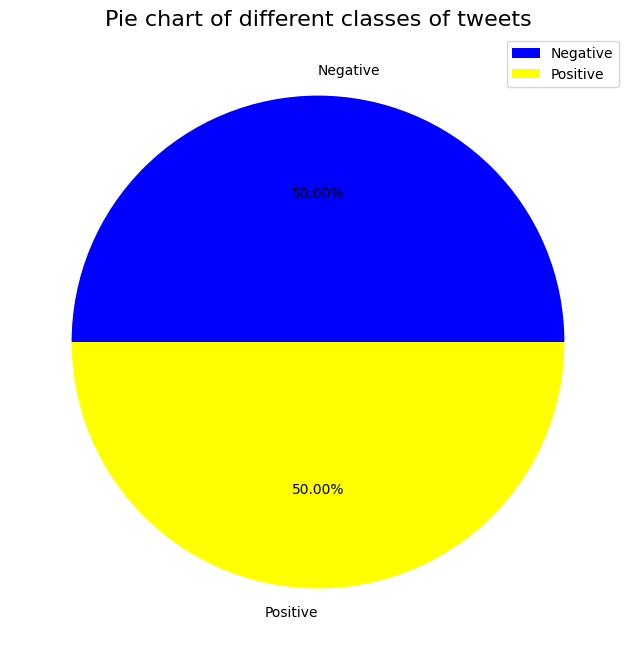

In [11]:
fig = plt.figure(figsize=(8,8))
targets = data.groupby('target_emotion').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['blue','yellow'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

### Comparison of tweet lengths

In [12]:
data['length'] = data.content.str.split().apply(len)

To be added: Graphs to compare the lengths of tweets, analysis per user

### Word Cloud

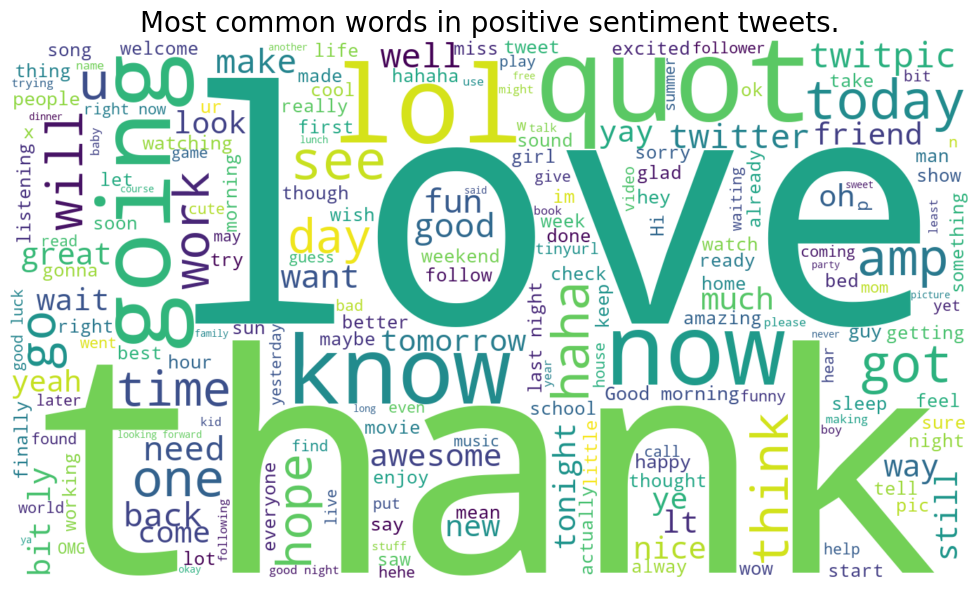

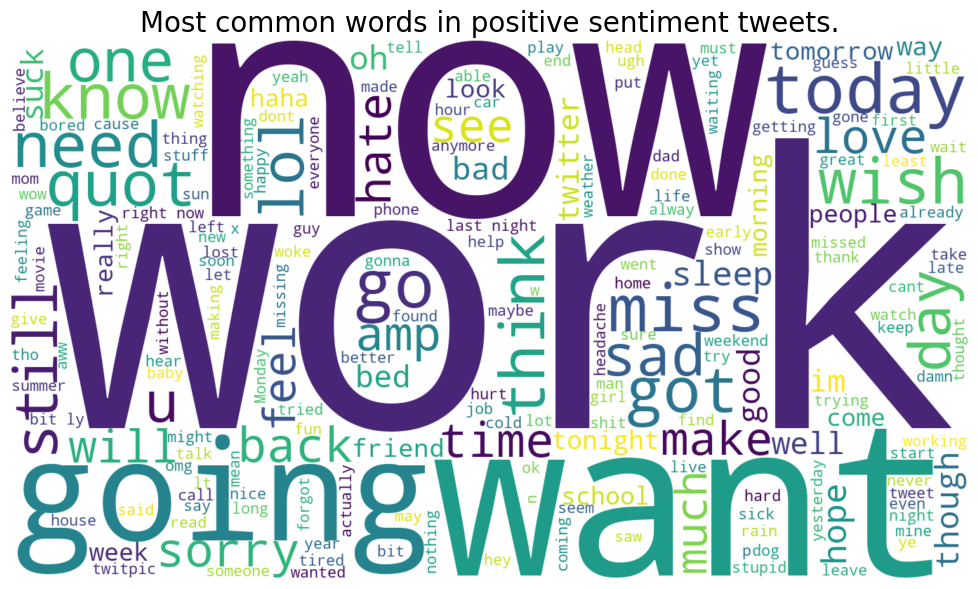

In [19]:
for emotion in ["Positive", "Negative"]:
    plt.figure(figsize=(14,7))
    word_cloud = wordcloud.WordCloud(stopwords = wordcloud.STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(data[data.target_emotion==emotion].content))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most common words in {emotion} sentiment tweets.',fontsize=20)
    plt.show()